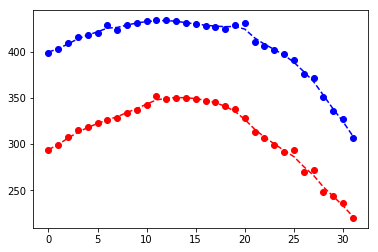

In [48]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

measurements = np.asarray([(399,293),(403,299),(409,308),(416,315),(418,318),(420,323),(429,326),(423,328),(429,334),(431,337),(433,342),(434,352),(434,349),(433,350),(431,350),(430,349),(428,347),(427,345),(425,341),(429,338),(431,328),(410,313),(406,306),(402,299),(397,291),(391,294),(376,270),(372,272),(351,248),(336,244),(327,236),(307,220)])

initial_state_mean = [measurements[0, 0],
                      0,
                      measurements[0, 1],
                      0]

transition_matrix = [[1, 1, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]]

observation_matrix = [[1, 0, 0, 0],
                      [0, 0, 1, 0]]

kf1 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean)

kf1 = kf1.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements)

plt.figure(1)
times = range(measurements.shape[0])
plt.plot(times, measurements[:, 0], 'bo',
         times, measurements[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'b--',
         times, smoothed_state_means[:, 2], 'r--',)
plt.show()

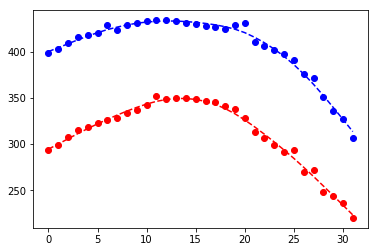

In [49]:
kf2 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean,
                  observation_covariance = 10*kf1.observation_covariance,
                  em_vars=['transition_covariance', 'initial_state_covariance'])

kf2 = kf2.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances)  = kf2.smooth(measurements)

plt.figure(2)
times = range(measurements.shape[0])
plt.plot(times, measurements[:, 0], 'bo',
         times, measurements[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'b--',
         times, smoothed_state_means[:, 2], 'r--',)
plt.show()

In [50]:
bogps = pd.read_csv('A:/Zhao/job/18035_ShuoHuangRail/elevation_KalmanFilter/BO_gps.csv')
bogps.head(10)

,ID,dist,lat,lon,ele
0,663,0.000,40.671873,109.743808,1035.0
1,665,0.001,40.671881,109.743813,1035.0
2,666,0.002,40.671886,109.743815,1035.0
3,668,0.003,40.671899,109.743821,1035.0
4,669,0.004,40.671905,109.743824,1035.0
5,670,0.005,40.671913,109.743828,1035.0
6,671,0.006,40.671921,109.743832,1035.0
7,672,0.007,40.671929,109.743836,1035.0
8,673,0.008,40.671939,109.743841,1035.0
9,675,0.010,40.671948,109.743846,1035.0


In [51]:
type(measurements)

numpy.ndarray

In [52]:
bo = bogps[['dist','ele']].values
type(bo)

numpy.ndarray

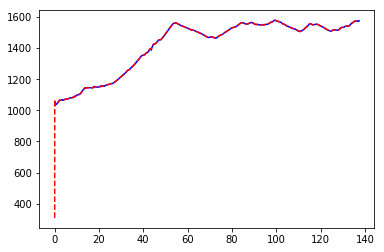

In [53]:
initial_state_mean = [measurements[0, 0],
                      0,
                      measurements[0, 1],
                      0]

transition_matrix = [[1, 1, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]]

observation_matrix = [[1, 0, 0, 0],
                      [0, 0, 1, 0]]

kf1 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean)

kf1 = kf1.em(bo, n_iter=5)
#(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(bo)




kf110 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean,
                  observation_covariance = 10*kf10.observation_covariance,
                  em_vars=['transition_covariance', 'initial_state_covariance'])

kf110 = kf110.em(bo, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf110.smooth(bo)

plt.figure(1)
plt.plot(bo[:, 0], bo[:, 1], 'b-',
         bo[:, 0], smoothed_state_means[:, 2], 'r--',)
plt.show()

In [54]:
np.savetxt('A:/Zhao/job/18035_ShuoHuangRail/elevation_KalmanFilter/BO_gps_smooth.csv',smoothed_state_means,delimiter=",")